In [1]:
import pandas as pd
df = pd.read_csv("../data/df_baseline.csv")

## Load Data

In [2]:
print(df.shape)
df.head()

(1083, 18)


,label,artist,album,genre,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,rating_pitch,twitter,instagram,facebook,spotify,soundcloud,youtube
0,0,Flash Bang Grenada,10 Haters,hiphop,0,0,0,0,0,NaN,NaN,NaN,0,0,0,346,0,0
1,0,Aggro Santos,AggroSantos.com,hiphop,3,0,0,0,0,NaN,NaN,NaN,63771,27415,596562,4675,585,7975
2,0,AKA,Altar Ego,hiphop,4,0,0,1,2,NaN,NaN,NaN,38958,0,0,22298,0,3643764
3,0,Shlohmo,Bad Vibes,hiphop,0,0,0,0,67,NaN,NaN,7.8,91790,59340,209063,141268,283539,0
4,0,Glasses Malone,Beach Cruiser,hiphop,4,0,0,0,4,NaN,NaN,NaN,68417,48745,93741,16402,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 18 columns):
label             1083 non-null int64
artist            1083 non-null object
album             1083 non-null object
genre             1083 non-null object
single_count      1083 non-null int64
freq_billboard    1083 non-null int64
freq_genius       1083 non-null int64
freq_theSource    1083 non-null int64
freq_xxl          1083 non-null int64
rating_AOTY       61 non-null float64
rating_meta       324 non-null float64
rating_pitch      220 non-null float64
twitter           1083 non-null int64
instagram         1083 non-null int64
facebook          1083 non-null int64
spotify           1083 non-null int64
soundcloud        1083 non-null int64
youtube           1083 non-null int64
dtypes: float64(3), int64(12), object(3)
memory usage: 152.4+ KB


**Note**
- 온라인매체 기사의 양, 평론가 평점은 Null Value가 있기 때문에, 당장 Decision Tree를 통해 학습을 시킬 수 없어, Feature에서 제외를 한다.

## Data Preparation for Modeling

#### 장르 `hiphop`, `R&B`, `Soul`, `Funk`, `Pop`

In [4]:
df = pd.get_dummies(df, columns=['genre'])

In [5]:
df.columns

Index(['label', 'artist', 'album', 'single_count', 'freq_billboard',
       'freq_genius', 'freq_theSource', 'freq_xxl', 'rating_AOTY',
       'rating_meta', 'rating_pitch', 'twitter', 'instagram', 'facebook',
       'spotify', 'soundcloud', 'youtube', 'genre_Soul', 'genre_funk',
       'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul'],
      dtype='object')

#### Split train & test data 

In [6]:
feature_names = ['single_count', 'freq_billboard',
                 'freq_genius', 'freq_theSource', 'freq_xxl',
                 'twitter', 'instagram', 'facebook',
                 'spotify', 'soundcloud', 'youtube',
                 'genre_funk', 'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul']
dfX = df[feature_names].copy()
dfy = df['label'].copy()

In [7]:
dfX.tail()

,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,twitter,instagram,facebook,spotify,soundcloud,youtube,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul
1078,0,0,0,200,9,3708,7855,10703,15130,1043,14066,0,0,1,0,0
1079,3,2,0,0,9,600,286554,355355,329507,21954,1728617,0,0,1,0,0
1080,2,0,0,0,0,1913,23837,9187,16544,756,743,0,0,1,0,0
1081,6,2,0,0,0,11571,27192,27615,60983,6295,43228,0,0,1,0,0
1082,4,1,0,0,213,19974,27428,60138,37009,2341,22642,0,0,1,0,0


In [8]:
dfy.tail()

1078    0
1079    0
1080    0
1081    0
1082    0
Name: label, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test, model.predict(X_test))

array([[203,   7],
       [ 35,  26]])

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.85      0.97      0.91       210
          1       0.79      0.43      0.55        61

avg / total       0.84      0.85      0.83       271



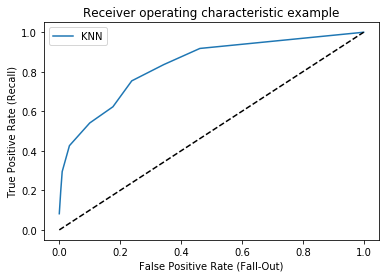

In [18]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="KNN")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [17]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8333723653395785

# SGD

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
model_SGD = SGDClassifier(random_state=0).fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [21]:
confusion_matrix(y_train, model_SGD.predict(X_train))

array([[274, 372],
       [ 23, 143]])

In [28]:
confusion_matrix(y_test, model_SGD.predict(X_test))

array([[ 85, 125],
       [  5,  56]])

In [23]:
print(classification_report(y_test, model_SGD.predict(X_test)))

             precision    recall  f1-score   support

          0       0.94      0.40      0.57       210
          1       0.31      0.92      0.46        61

avg / total       0.80      0.52      0.54       271



In [24]:
fpr, tpr, thresholds = roc_curve(y_test, model_SGD.predict(X_test))

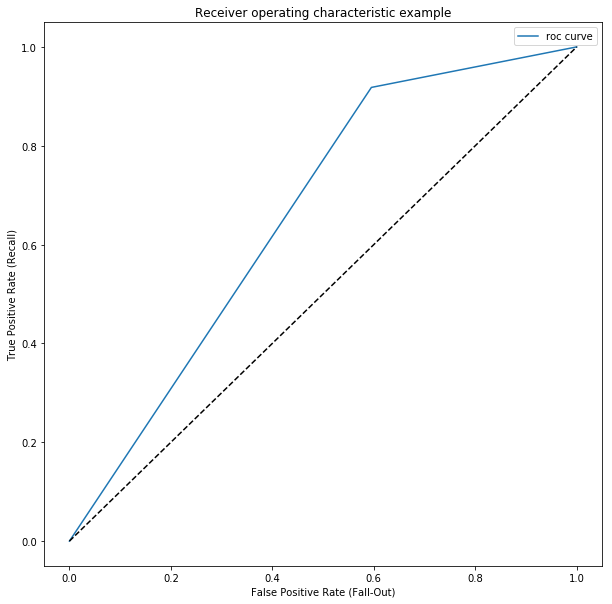

In [25]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, label="roc curve")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [26]:
auc(fpr, tpr)

0.6613973458235753